#ĐỖ Minh Triều_19146283

In [1]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline
from visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
--2022-06-22 14:43:18--  https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
Resolving pysource.com (pysource.com)... 104.21.67.193, 172.67.180.33, 2606:4700:3036::ac43:b421, ...
Connecting to pysource.com (pysource.com)|104.21.67.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  --.-KB/s    in 0.05s   

2022-06-22 14:43:18 (26.9 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved [1282557/1282557]

Archive:  Mask_RCNN_basic_1.zip
   creating: Mask_RCNN/
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   cr

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
images_path = "/content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/dataset.zip"
annotations_path = "/content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/annotations.json"
extract_images(os.path.join("/content/",images_path), "/content/dataset")

Extracted: 78 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/annotations.json
Annotation json path:  /content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/annotations.json
Train: 70
Validation: 8
Classes: 1


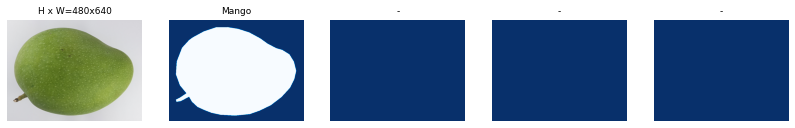

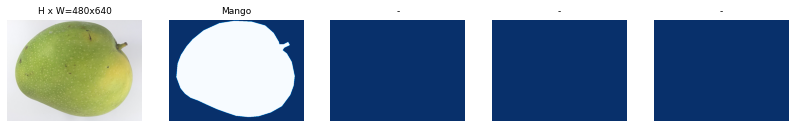

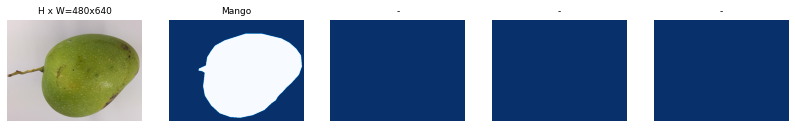

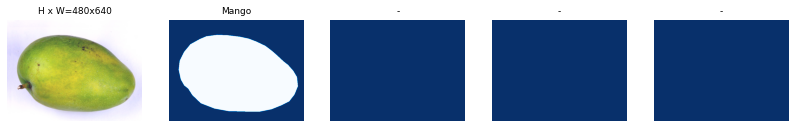

In [ ]:
display_image_samples(dataset_train)

In [ ]:
# load cấu hình train cho model
config = CustomConfig(class_number)
# load từ model mask_rcnn_coco.h5
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220621T1526/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

In [ ]:
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220621T1526/mask_rcnn_object_0005.h5
Re-starting from epoch 5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  221.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  221.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  117.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


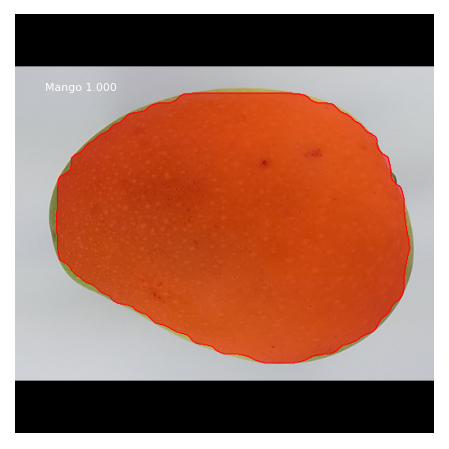

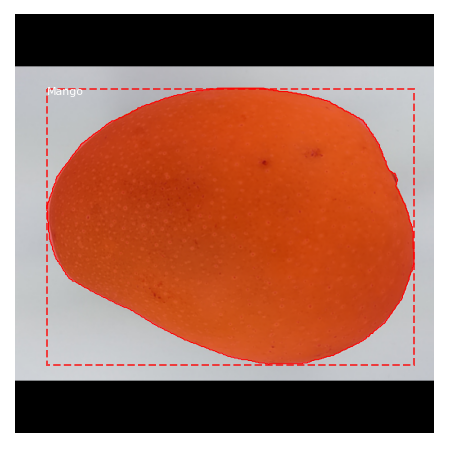

In [ ]:
test_random_image(test_model, dataset_val, inference_config)

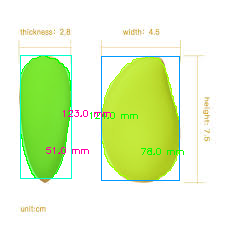

In [ ]:
img = cv2.imread("File name")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r = test_model.detect([image])[0]
colors = random_colors(80)
from google.colab.patches import cv2_imshow

object_count = len(r["class_ids"])

for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 1)
        img = draw_mask(img, [cnt], colors[i])
        rect = cv2.minAreaRect(cnt)
        (x,y),(w,h), angle = rect
        cv2.rectangle(img,(int(x+w/2),int(y+h/2)),(int(x-w/2),int(y-h/2)),colors[i+3],1)       
        cv2.putText(img, "{:.1f} mm".format(round(h,1)), (int(w+10), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)        
        cv2.putText(img, "{:.1f} mm".format(round(w,1)), (int(x), int(h+30)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)  
#visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'],show_bbox=True)
cv2_imshow(img)

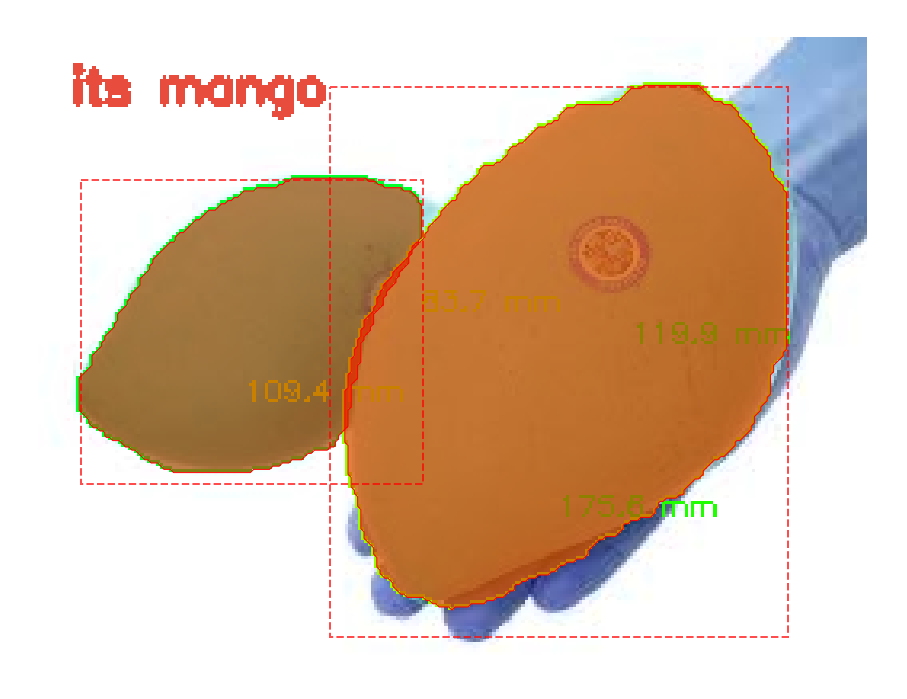

In [ ]:
img = cv2.imread("filename.jpeg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
colors = random_colors(80)
object_count = len(r["class_ids"])

for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    Classes = len(r["class_ids"])
    Xoai ={0: 'its mango'}
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 1)
        img = draw_mask(img, [cnt], colors[i])
        rect = cv2.minAreaRect(cnt)
        (x,y),(w,h), angle = rect
        #cv2.rectangle(img,(int(x+w/2),int(y+h/2)),(int(x-w/2),int(y-h/2)),colors[i+3],1)       
        cv2.putText(img, "{:.1f} mm".format(round(h,1)), (int(w+10), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)        
        cv2.putText(img, "{:.1f} mm".format(round(w,1)), (int(x), int(h+30)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)
        cv2.putText(img, "{}".format(Xoai[np.argmax(r["class_ids"])]), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (231, 76, 60), 2)  
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'],show_bbox=True)
#cv2_imshow(img)

In [3]:
test_model,inference_config =  load_inference_model(1,'/content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/mask_rcnn_object_0005 (2).h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/Colab Notebooks/ProjectAICuoiki/mask_rcnn_object_0005 (2).h5


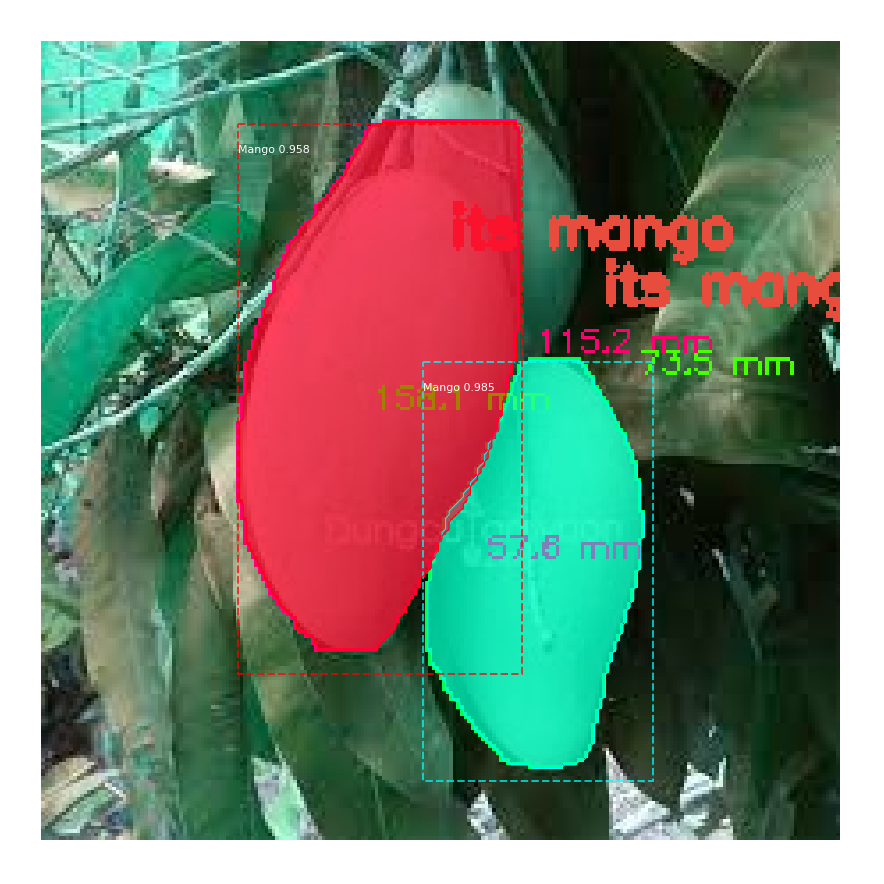

In [ ]:
img = cv2.imread("/content/Xoai (16).jpeg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
colors = random_colors(80)
object_count = len(r["class_ids"])

for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    Classes = len(r["class_ids"])
    Xoai ={0: 'its mango'}
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 1)
        img = draw_mask(img, [cnt], colors[i])
        rect = cv2.minAreaRect(cnt)
        (x,y),(w,h), angle = rect
        #cv2.rectangle(img,(int(x+w/2),int(y+h/2)),(int(x-w/2),int(y-h/2)),colors[i+3],1)       
        cv2.putText(img, "{:.1f} mm".format(round(h,1)), (int(w+10), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)        
        cv2.putText(img, "{:.1f} mm".format(round(w,1)), (int(x), int(h+30)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)
        cv2.putText(img, "{}".format(Xoai[np.argmax(r["class_ids"])]), (int(w), int(h)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (231, 76, 60), 2)  
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'],show_bbox=True)
#cv2_imshow(img)

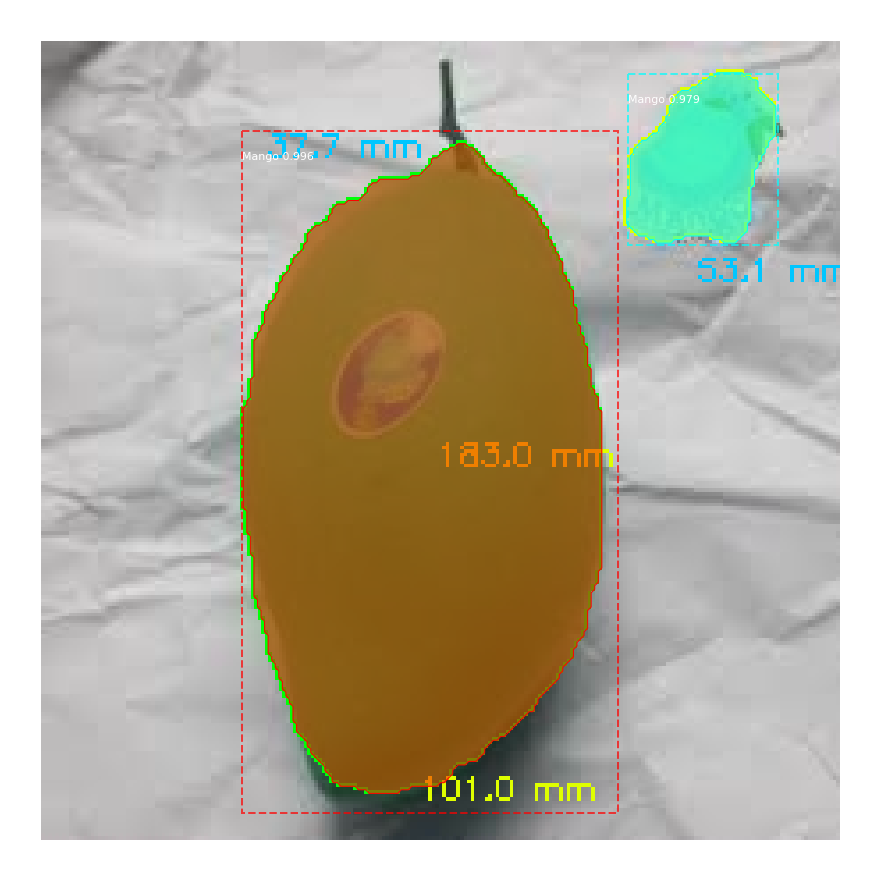

In [ ]:
img = cv2.imread("/content/Xoai (20).jpeg")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]
colors = random_colors(80)
object_count = len(r["class_ids"])

for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    Classes = len(r["class_ids"])
    Xoai ={0: 'its mango'}
    for cnt in contours:
        cv2.polylines(img, [cnt], True, colors[i], 1)
        img = draw_mask(img, [cnt], colors[i])
        rect = cv2.minAreaRect(cnt)
        (x,y),(w,h), angle = rect
        #cv2.rectangle(img,(int(x+w/2),int(y+h/2)),(int(x-w/2),int(y-h/2)),colors[i+3],1)       
        cv2.putText(img, "{:.1f} mm".format(round(h,1)), (int(w+10), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)        
        cv2.putText(img, "{:.1f} mm".format(round(w,1)), (int(x), int(h+30)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)
        cv2.putText(img, "{}".format(Xoai[np.argmax(r["class_ids"])]), (int(w), int(h)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (231, 76, 60), 2)  
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'],show_bbox=True)
#cv2_imshow(img)

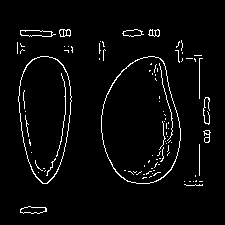

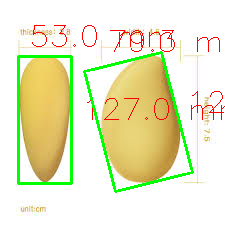

In [ ]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
def read_and_preproces(filename, canny_low= 20, canny_high = 20, blur_kernel=9, d_e_kernel=3):
    # Đọc file ảnh
    image = cv2.imread('/content/images.jpg')
    # Chuyển thành ảnh xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Làm mờ ảnh
    gray = cv2.GaussianBlur(gray, (blur_kernel, blur_kernel), 0)

    # Áp dụng Canny tìm cạnh
    edged = cv2.Canny(gray, canny_low, canny_high)
    edged = cv2.dilate(edged, (d_e_kernel, d_e_kernel), iterations=1)
    edged = cv2.erode(edged, (d_e_kernel, d_e_kernel), iterations=1)
    return image, edged


image, edged = read_and_preproces('input.JPG')
cv2_imshow(edged)
cv2.waitKey()


def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) / 2, (ptA[1] + ptB[1]) / 2)


def get_distance_in_pixels(orig, c):
    # Lấy minRect
    box = cv2.minAreaRect(c)
    # Lấy tọa độ các đỉnh của MinRect
    box = cv2.boxPoints(box)

    box = np.array(box, dtype="int")

    # Sắp xếp các điểm theo trình tự
    box = perspective.order_points(box)

    # Vẽ contour
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # Tinh toán 4 trung diểm của các cạnh
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    # Tính độ dài 2 chiều
    dc_W = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dc_H = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    return dc_W, dc_H, tltrX, tltrY, trbrX, trbrY


def find_object_in_pix(orig, edge, area_threshold=3000):
    # Tìm các Contour trong ảnh
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Sắp xếp các contour từ trái qua phải
    (cnts, _) = contours.sort_contours(cnts)
    P = None

    # Duyệt các contour
    for c in cnts:
        # Nếu contour quá nhỏ -> bỏ qua
        if cv2.contourArea(c) < area_threshold:
            continue

        # Tính toán 2 chiều bằng Pixel
        dc_W, dc_H, tltrX, tltrY, trbrX, trbrY = get_distance_in_pixels(orig, c)

        # Ve kich thuoc len hinh
        cv2.putText(orig, "{:.1f} mm".format(dc_H), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 255), 1)
        cv2.putText(orig, "{:.1f} mm".format(dc_W), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 255), 1)

    return orig
image = find_object_in_pix(image, edged)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

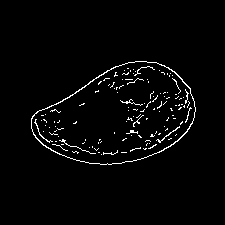

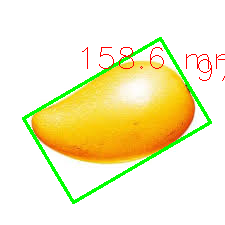

In [8]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
def read_and_preproces(filename, canny_low= 20, canny_high = 20, blur_kernel=9, d_e_kernel=3):
    # Đọc file ảnh
    image = cv2.imread('/content/Xoai (17).jpeg')
    # Chuyển thành ảnh xám
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Làm mờ ảnh
    gray = cv2.GaussianBlur(gray, (blur_kernel, blur_kernel), 0)

    # Áp dụng Canny tìm cạnh
    edged = cv2.Canny(gray, canny_low, canny_high)
    edged = cv2.dilate(edged, (d_e_kernel, d_e_kernel), iterations=1)
    edged = cv2.erode(edged, (d_e_kernel, d_e_kernel), iterations=1)
    return image, edged


image, edged = read_and_preproces('input.JPG')
cv2_imshow(edged)
cv2.waitKey()


def midpoint(ptA, ptB):
    return ((ptA[0] + ptB[0]) / 2, (ptA[1] + ptB[1]) / 2)


def get_distance_in_pixels(orig, c):
    # Lấy minRect
    box = cv2.minAreaRect(c)
    # Lấy tọa độ các đỉnh của MinRect
    box = cv2.boxPoints(box)

    box = np.array(box, dtype="int")

    # Sắp xếp các điểm theo trình tự
    box = perspective.order_points(box)

    # Vẽ contour
    cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)

    # Tinh toán 4 trung diểm của các cạnh
    (tl, tr, br, bl) = box
    (tltrX, tltrY) = midpoint(tl, tr)
    (blbrX, blbrY) = midpoint(bl, br)
    (tlblX, tlblY) = midpoint(tl, bl)
    (trbrX, trbrY) = midpoint(tr, br)

    # Tính độ dài 2 chiều
    dc_W = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
    dc_H = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

    return dc_W, dc_H, tltrX, tltrY, trbrX, trbrY


def find_object_in_pix(orig, edge, area_threshold=3000):
    # Tìm các Contour trong ảnh
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)

    # Sắp xếp các contour từ trái qua phải
    (cnts, _) = contours.sort_contours(cnts)
    P = None

    # Duyệt các contour
    for c in cnts:
        # Nếu contour quá nhỏ -> bỏ qua
        if cv2.contourArea(c) < area_threshold:
            continue

        # Tính toán 2 chiều bằng Pixel
        dc_W, dc_H, tltrX, tltrY, trbrX, trbrY = get_distance_in_pixels(orig, c)

        # Ve kich thuoc len hinh
        cv2.putText(orig, "{:.1f} mm".format(dc_H), (int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 255), 1)
        cv2.putText(orig, "{:.1f} mm".format(dc_W), (int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX, 1,
                    (0, 0, 255), 1)

    return orig
image = find_object_in_pix(image, edged)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()

In [6]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [7]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

/content


<IPython.core.display.Javascript object>

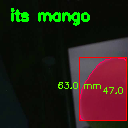

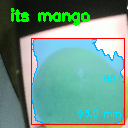

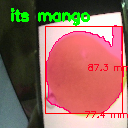

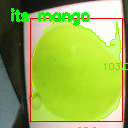

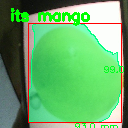

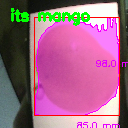

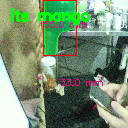

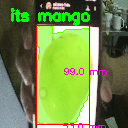

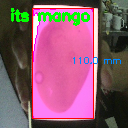

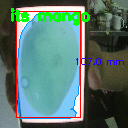

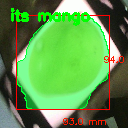

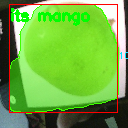

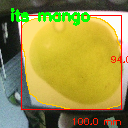

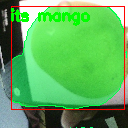

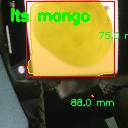

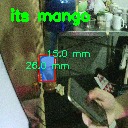

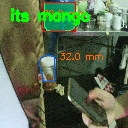

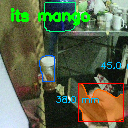

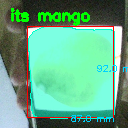

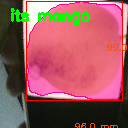

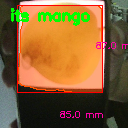

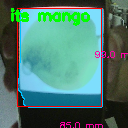

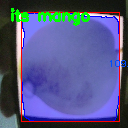

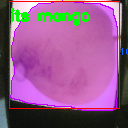

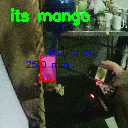

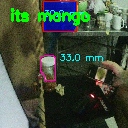

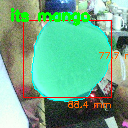

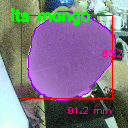

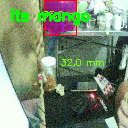

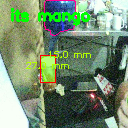

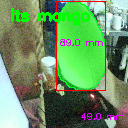

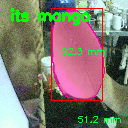

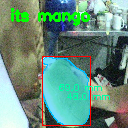

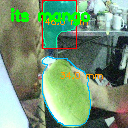

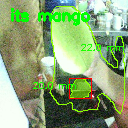

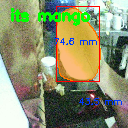

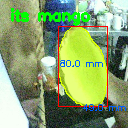

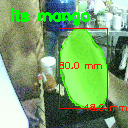

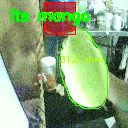

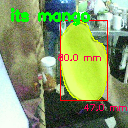

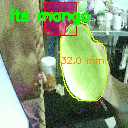

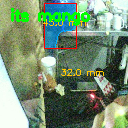

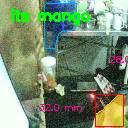

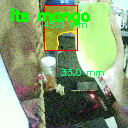

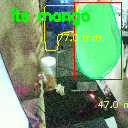

KeyboardInterrupt: ignored

In [15]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model

video_stream()
label_html = 'Đang lấy hình ảnh...'

bbox = ''
count = 0 

#test_model, inference_config = load_inference_model(1, "/content/drive/MyDrive/Colab Notebooks/modeltrain/mask_rcnn_object_0005.h5")


while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    frame = js_to_image(js_reply["img"])

    colors = random_colors(80)
    image = cv2.resize(frame, dsize=(128,128))

    r = test_model.detect([image])[0] 

    Classes = len(r["class_ids"])
  
    Xoai ={0: 'its mango'}
  
    object_count = len(r["class_ids"])

    for i in range(object_count):
           #1. Mask
        mask = r["masks"][:, :, i]
        contours = get_mask_contours(mask)
        for cnt in contours:
           cv2.polylines(image, [cnt], True, colors[i], 1)
           img = draw_mask(image, [cnt], colors[i])
           rect = cv2.minAreaRect(cnt)
           (x,y),(w,h), angle = rect
           cv2.rectangle(img,(int(x+w/2),int(y+h/2)),(int(x-w/2),int(y-h/2)),(0,0,255),1)       
           cv2.putText(img, "{:.1f} mm".format(round(h,1)), (int(w+10), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)        
           cv2.putText(img, "{:.1f} mm".format(round(w,1)), (int(x), int(h+30)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,colors[i+1], 1)  
           cv2.putText(img, "{}".format(Xoai[np.argmax(r["class_ids"])]), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255,0), 2)
    #visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'], dataset_val.class_names, r['scores'],show_bbox=True)
        cv2_imshow(img)
